In [14]:
# importing libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
#Jaccard Index
from sklearn.metrics import jaccard_score



In [3]:

from google.colab import files

uploaded = files.upload()

Saving assig2.csv to assig2.csv


In [15]:
#loading data as a data frame
data = pd.read_csv('assig2.csv')
data.head()

sr  Marks >50  Attendance>50  Subjects > 20 Grade(S/U)
0   0          1              1              1          S
1   1          1              1              0          S
2   2          0              1              1          U
3   3          1              0              0          S
4   4          0              1              1          U

In [16]:
# Splitting dataset
x = data.drop('Grade(S/U)', axis=1)
y = data['Grade(S/U)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)# 70% training and 30% test

In [17]:
# Train and predict the model
k=3 
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
y_predict = neigh.predict(x_test)

In [18]:
print (classification_report(y_test, y_predict,digits=3)) 
print("Jaccard Score",round(jaccard_score(y_test,  y_predict, pos_label="S"),3))

              precision    recall  f1-score   support

           S      1.000     0.500     0.667         4
           U      0.000     0.000     0.000         0

    accuracy                          0.500         4
   macro avg      0.500     0.250     0.333         4
weighted avg      1.000     0.500     0.667         4

Jaccard Score 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
#2nd method
x = data.drop('Grade(S/U)', axis=1)
y = data['Grade(S/U)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [21]:
kmeans = KMeans(init="random",n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [22]:
kmeans.fit(x_train_std)

KMeans(init='random', n_clusters=3, random_state=42)

In [23]:
kmeans.labels_ 
print(kmeans.inertia_)
print(kmeans.n_iter_)

15.0293410041841
2


In [25]:
from sklearn.cluster import DBSCAN
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.3)
kmeans.fit(x_train_std)
dbscan.fit(x_train_std)

DBSCAN(eps=0.3)

In [26]:
np.unique(kmeans.labels_)

array([0, 1, 2], dtype=int32)

In [27]:
kmeans_silhouette = silhouette_score(x_train_std, kmeans.labels_, metric='euclidean')
print("kmeans_silhouette:", kmeans_silhouette)


kmeans_silhouette: 0.31105736930819416


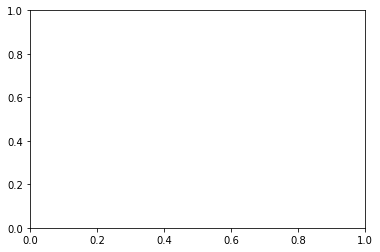

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(vis_data=data,  pro=kmeans.labels_)
plt.show()